# 1 Time-Varying Data

The goals of this exercise are to:

- learn what kind of data we deal with in neuroscience
- how it can be represented and manipulated in digital computers
- introduce Python notebooks

A notebook is an interactive document that lets you mix text and computer code, organized into `cells`. A cell can contain either text or code. This is a text cell. You can edit the contents of this cell by double-clicking, then save by typing `Ctrl-Enter`.

## Your Assignment 

- Turn in a written response to each of the questions (e.g. **Q1**) below. 
- If working in teams, assign the least experienced programmer to operate the notebook
- Assign the most experienced program to write the responses
- Only one submission per team, please

Please note that if you're running the notebook on [mybinder](https://mybinder.org), you'll need to download the `ipynb` file (see the `File/Download as` menu) to save any work to your local computer if you want to work on the notebook later.

## Introduction to the Python Notebook

The cell below this is a code cell, as indicated by `In [ ]:` off to the left. When you type `Ctrl-Enter` in a code cell, the contents are passed to the Python interpreter. Each line is executed in turn. If the last line evaluates to something, this will be shown below the code cell. To run the notebook, you need to type `Ctrl-Enter` in each cell (including the one below):

In [1]:
8 + 9 * 2
(3 + 5) * 2

16

Why did the interpreter only print the value of the last line? 

Some important things to understand about computer programs:

- Think of each statement as a command to an stupid but extremely fast robot. 
- When you type `Ctrl-Enter` in a cell, the robot will do what each line in the cell says. 
- If the last statement is an expression that has some value, the interpreter prints that out.

### Python is interactive

It's common to work with an interpreter in this *interactive* mode, which is also called a *read-evaluate-print-loop* (REPL).

You can evaluate the same cell over and over, which is equivalent to telling the robot to do the same thing as it did before. However, if you edit the contents of the cell, you'll get results that correspond to your new statements and expressions.

### Variables

An important task the interpreter can do is to store and retrieve data from memory. A **variable** is essentially a named container where information can be stored. In Python, storing a value in a variable (**assignment**) is done with the equals sign (`=`). The value on the right side is assigned to the variable on the left. Variables are created the first time you use them, and you don't have to tell the interpreter what the type of the data is (more on this later).

In [ ]:
age = 42
name = "Arthur"

Note that in contrast to the cell above, this code does not generate an output. 

To retrieve the value of a variable, you just use the name of the variable. For example, the expression below will evaluate to the value currently stored in `age`.

In [ ]:
age

#### Displaying variables

You can also use the `print` function to display the values of variables. To use `print`, simply put the variables and expressions you want to display between parentheses, separated by commas, as below:

In [ ]:
print(name, "is", age, "years old.")

#### Altering variables

It's important to keep in mind that when you use a variable in an expression, the interpreter looks up the **current value**. 

Storing a new value in a variable doesn't affect prior statements. 

Look at the following cell and try to determine (before running the cell) what the value of `my_sum` will be.

In [2]:
initial = 42
my_sum = initial + 29
initial = 0

print("my sum is", my_sum)

my sum is 71


### Controlling the interpreter

As you execute code cells, the interpreter's **state** will change as values are stored in variables. All the cells in a notebook live in the same workspace or `kernel`. That means if you change the value of `age` and then go back and execute the code two cells above, you'll get a different output.

There's nothing to keep you from running cells out of order, and this can be very useful when you're working on solving a problem. However, you can easily get your kernel into a state where a lot of variables are not what you think they are. When this happens, usually the best strategy is to restart the kernel. To do this, go to the `Kernel` menu, select `Restart and Clear Output`. Then to re-run the code, go to the `Cell` menu and select `Run All Above`. Try this now.

While you're looking up there, browse through the other menus and buttons at the top of the page. You can copy, cut, and paste cells with the `Edit` menu to move them around, or insert blank cells in the notebook. This can be very useful when you're experimenting but don't want to mess up some of the code I've provided you. 

Finally, don't ignore the `Help` menu - it explains more about using the notebook and has links to documentation for many of the scientific programming libraries we'll be using.

### Data types

What kinds of data can you put in a variable in Python? The core data types are:

- strings of characters (`strings`)
- numbers (`integers` and `floats`)

Strings are used to store text. You'll often use strings as labels; for example, to indicate what stimulus was played or the identifier for a neuron. Python strings support unicode (which means they can be fancy Greek or other non-Roman letters), and are constructed by using single or double quotes. The following two expressions are the same.

In [ ]:
'mötörheαd'
"mötörheαd"

### Numerical data types

There are two main kinds of numerical data types: integers and floats. Integers can be positive or negative, but they never have a fractional component. They're frequently used as counters, indexes, and categorical labels. Floating point numbers represent real quantities, and can be entered as decimals or using scientific notation:

In [ ]:
an_integer = -1
a_float = 1.0
another_float = 1.22e6
print(an_integer, a_float, another_float)

As an aside, computers have limited precision representing real numbers, and you sometimes will see weird behavior like in the cell below. For the most part, you can ignore this [representation error](https://docs.python.org/2/tutorial/floatingpoint.html) issue, as none of the quantities you're working with are known to 10+ decimal places. However, it's a good reason to use integers instead of floats whenever you know that there's not supposed to be a fractional component.

In [ ]:
0.1 + 0.2

## Time-varying Data

In neurophysiology, much of the data we'll be working with represents some process that changes in time. There are two fundamental ways of representing time-varying data in a computer:

A **time series** is a quantitative physical property of a system measured over a time interval. 

- In digital computers, time series data are always sampled at discrete moments in time.
- The *sampling rate* of the data is the number of times per second the underlying process was measured. 
- Examples of time series include sound waveforms and recordings of extracellular voltage.

A **point process** is a series of times when an event took place. 
  
- An example of a point process is the set of times when a neuron produced an action potential (spike).

### Arrays

Both time series and point process data involve many data points, one for each sampling interval (for time series) or for each event (for point processes). It would be very inefficient to have to give each data point a name; moreover, there's an inherent **order** to the data points that we want to preserve. Fortunately, Python can also store ordered collections of values in a data type called an **array**.

We'll start by considering one-dimensional arrays, which are simply a series of values that all have the same type (e.g., integer or floating point). Point processes and time series can both be stored in arrays; however, the meaning of the values is different. For a time series, the array holds the sequence of **measurements**. For a point process, the array holds the sequence of **event times**.

But enough theory! Let's look at some data. Start by running the cell below, which imports some external libraries. You don't need to worry about the contents yet.

In [1]:
%matplotlib ipympl
import sys
from pathlib import Path
import numpy as np
import scipy as sp
import IPython
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
import ipywidgets as widgets
# sys.path.insert(0,"/standard/psyc5270-cdm8j/comp-neurosci")
from comp_neurosci_uva import signal, data, graphics

---
## Time Series: Intracellular Voltage

One method of monitoring neural activity is by placing an electrode inside a neuron and measuring the voltage relative to a grounding electrode in the bath (below, top right trace):

<img src="https://gracula.psyc.virginia.edu/public/courseware/comp-neurosci/images/recording_dayan.png" alt="recording methods" style="width: 400px;"/>

This generates a **time series** of voltage measurements.

Let's look at an example of a timeseries. Run the cell below.

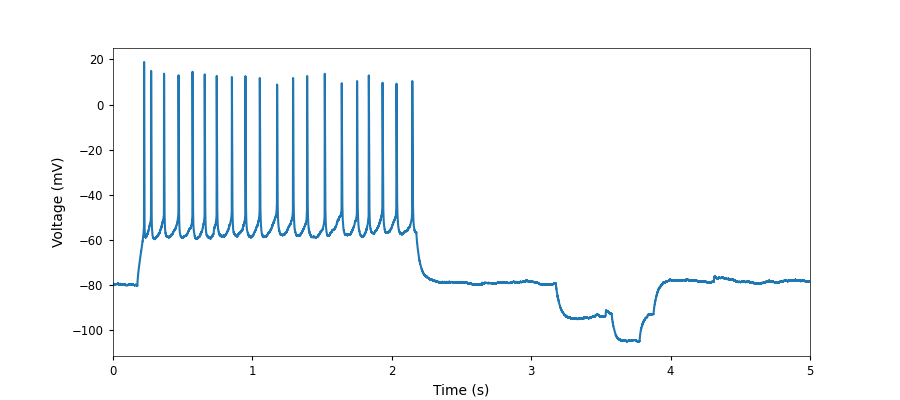

In [2]:
V, Fs = data.load_timeseries(Path("zf", "intracellular", "920061fe_2_4.wav"))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
t = np.arange(0.0, len(V)) / Fs
axes.plot(t, V)
axes.set_xlabel("Time (s)")
axes.set_ylabel("Voltage (mV)")
axes.set_xlim(0, 5.0);

The plot shows the recorded voltage as a function of time. The neuron was stimulated with positive and negative current pulses. The positive pulse evoked a series of action potentials, which are the sharp spikes between 0.2 and 2.2 s. 

**Q1**

1. How many spikes did the neuron produce? 
2. Zoom in on one of the spikes by adjusting the x-axis limits (hint: edit the last line of the code cell). Describe what this looks like up close.
4. Zoom in on the negative-going response a bit after 3 s. Describe the shape of the curve.

### Sampling rate and bit depth

The voltage trace in the plot above is a **sampled** time-series. Although the underlying voltage dynamics are continuous in time, the computer that made the recording only stored the voltage at discrete time intervals. The time between those intervals is called the **sampling period**, and the inverse of this value is the **sampling rate**.

Similarly, although voltage is a continuous quantity, the computer has to store the voltage as a discrete value. Digital computers use binary memory, which means that numbers are represented as a series of *bits*, or binary digits. The number of bits for each sample determines the **resolution** or **bit depth** of the sampling. The more bits, the more different values can be stored.

#### Nyquist-Shannon theorem

Clearly, increasing the sampling rate will increase the amount of hard drive space a recording will use. If a signal is sampled at 40 kHz, it will use twice as much space as the same signal sampled at 20 kHz. So what's the right sampling rate to use?

According to the [Nyquist-Shannon theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem), in order for a sampled time series to represent a signal that's changing at $x$ Hz, the signal has to be sampled at $2x$ Hz. Let's see why this is by looking at one of the action potentials:

FloatLogSlider(value=19952.62314968879, description='sampling_rate:', max=4.3, min=2.0, step=0.05)

Output()

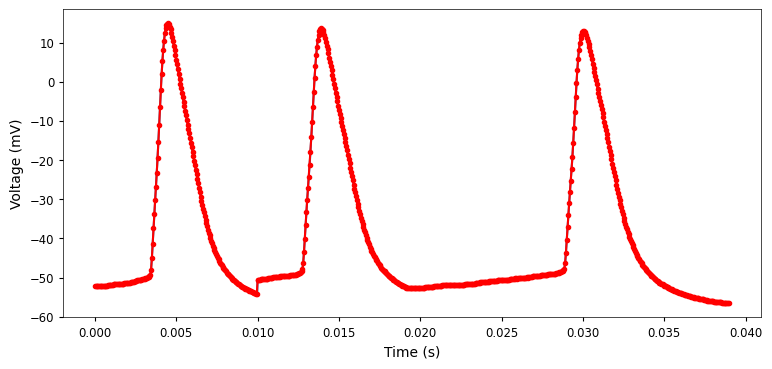

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

sampling_rate = widgets.FloatLogSlider(value=20000, base=10, min=2, max=4.3, step=0.05, 
                                        description="sampling_rate:", continuous_update=True)
display(sampling_rate)

Vspk = np.r_[V[10900:11300], V[14630:15000], V[18510:19300]]
tspk = np.arange(0.0, len(Vspk)) / Fs
ax.plot(tspk, Vspk)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (mV)")
p = ax.plot(tspk, Vspk, 'r.-')

def update(sampling_rate):
    downsample = Fs // int(sampling_rate)
    V_ds = Vspk[::downsample]
    t_ds = tspk[::downsample]
    p[0].set_data(t_ds, V_ds)

widgets.interactive_output(update, {"sampling_rate": sampling_rate})

This plot demonstrates the use of **widgets**, which we'll use in the first part of the class to explore how particular parameters affect our models and analyses. You can adjust the slider to change the sampling rate and see how sampling rate affects how well a sampled time series (in red) is able to represent changes in the "true" data (in blue). Each red dot indicates a sample. For illustration purposes, I've placed three spikes close to each other, cutting out some of the intervening time. 

After getting to know how the slider works, answer the following questions. Your answers can be qualitative.

**Q2**

1. What's the lowest sampling rate at which you can resolve the time of the peak of all three spikes to within 1 ms? How does this value compare to the duration of the peak?
2. What's the lowest sampling rate at which you can resolve the time of the onset of all three spikes to within 1 ms?
3. How high does the sampling rate need to be to accurately follow the tail of the last spike? How does this value compare to the duration of the downslope?

---
## Time Series: Extracellular Voltage

Another method of monitoring neural activity is by placing an electrode right next to a neuron (below, middle right trace). This is called "extracellular recording". As we'll see below, you can still detect action potentials, but not the subthreshold activity of the neuron.

<img src="https://gracula.psyc.virginia.edu/public/courseware/comp-neurosci/images/recording_dayan.png" alt="recording methods" style="width: 400px;"/>

One major advantage of extracellular recording is that you can monitor activity in the brain while the animal is still alive and behaving. This allows us to more directly examine how sensory activity and brain activity are related. For example, we can present an auditory stimulus to the animal and record the evoked response:

![experiment diagram](https://gracula.psyc.virginia.edu/public/courseware/comp-neurosci/images/experiment_diagram.png "Auditory Neurophysiology Experiment")


Let's see what an extracellular response looks like:

In [ ]:
stim_name = "A8"
stim, sampling_rate = data.load_timeseries(Path("starling", "stimuli", stim_name + ".wav"))
spec, freq, bins = signal.specgram(stim, sampling_rate)
r, t = data.load_raw_responses(Path("starling", "extracellular"), unit="st11_1_2", stimname=stim_name)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), sharex=True)
axes[0].imshow(spec, extent=(bins[0], bins[-1], freq[0], freq[-1]), origin='lower', aspect='auto', cmap='jet')
axes[0].set_ylabel("Frequency (kHz)")
axes[0].set_title("Stimulus spectrogram")
axes[1].plot(t, r[0])
axes[1].set_xlabel("Time (s)")
axes[1].set_title("Response");

The top plot is a **spectrogram** of the stimulus. Spectrograms show the power in the sound as a function of time and frequency. More intense colors indicate more power. We'll discuss spectrograms in more detail later, but for now, all you need to know is that you can read the plot like a musical score.

The bottom plot shows the neural recording. The recording begins before the stimulus starts and continues after it ends. These parts of the response are called the **background** or **spontaneous activity**. The part of the response that's aligned with the stimulus is called the **evoked response**.

**Q3**

1. Most of the recording is low-amplitude **noise**. Zoom in on a section of the response around 0 s. Describe what this looks like up close.
3. This neuron responded with brief bursts of **action potentials**, which caused high-amplitude **spikes** in the signal around 4 s. Zoom in on these and describe what the spikes look like.
4. Zoom back out a little and see if you can spot some patterns in the spectrogram that preceded the spiking. Do these data suggest that the neuron is responding to a particular kind of sound?

---
There are many sources of variability in the brain, so not every spike in a given trial is necessarily caused by the stimulus. Thus, each stimulus is usually presented 5-20 times to get an average that represents the part of the response that's driven by the stimulus. Let's look at a few responses to the same stimulus:

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6), sharex=True)
axes[0].imshow(spec, extent=(bins[0], bins[-1], freq[0], freq[-1]), origin='lower', aspect='auto', cmap='jet')
axes[0].set_ylabel("Frequency (kHz)")
axes[1].plot(t, r[0])
axes[2].plot(t, r[1])
axes[3].plot(t, r[2])
axes[3].set_xlabel("Time (s)")

**Q4:** Zoom in on the spike bursts and compare the responses across the trials. What are the differences? What stays the same?

### Spike sorting

A key first step in analyzing the results of an experiment is to *sort spikes*. This is a process that takes the raw neural recordings, which are densely sampled time series, and extracts the times when a spike ocurred. To be able to say that a set of spikes represents a single neuron, we need to make sure that the waveforms are distinct from the noise. There are many different methods of doing *spike sorting*, but the major steps usually consist of:

1. filter the recording to emphasize fast transients (spikes)
1. identify potential spikes and extract their waveforms
2. cluster similar waveforms together and exclude noise and artifacts

![spike sorting diagram](https://gracula.psyc.virginia.edu/public/courseware/comp-neurosci/images/spike_sorting_diagram.png)


Let's start with spike detection. What we need to do is determine when the signal crosses above a threshold. Setting the threshold is usually done manually. The following code snippet will illustrate how this is done.

In [ ]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((1,4),(0,0),colspan=3)
ax1.set_title("Response")
ax2 = plt.subplot2grid((1,4),(0,3))
ax2.set_title("Spikes")
fig.subplots_adjust(wspace=0.3)

# you can change unit name and stimulus to try with other data if you've fetched the data repository
r, t = data.load_raw_responses(Path("starling", "extracellular"), unit="st11_1_2", stimname=stim_name)
graphics.spike_detector(ax1, ax2, r[0], t)

Move the `Threshold` slider to adjust the position of the black line. Any events that cross this line will be detected. A subset of the detected events will be plotted in the right panel as you adjust the threshold, and you can see the detected events marked with a red dot.

**Q5:** Try adjusting the threshold so that all of the detected events have similar waveforms. How many spikes were evoked by the stimulus? What happens if you set the threshold too low?

---
## Point-Process: Spike Times

Typically, with extracellular data we're only interested in the **times** when the neuron spiked, not the shape of the waveform. There's a (somewhat tedious) analysis called *spike-sorting* that extracts spike times from extracellular recordings. It begins with setting a threshold (as above) but also includes some additional steps to isolate real spikes from noise and from the signals of other neurons. At the end of this analysis, we have a **point process** representation of the neural activity, consisting only of the times when the neuron spiked.

Let's see what these data look like. Run the code snippet below:

In [ ]:
from comp_neurosci_uva import pprox
unit = "st11_1_2_1"
stim_name = "A8"

stim, sampling_rate = data.load_timeseries(Path("starling", "stimuli", stim_name + ".wav"))
spec, freq, bins = signal.specgram(stim, sampling_rate)

resp = data.load_pprox(Path("starling", "pprox", unit))
resp_A8 = pprox.select_stimulus(resp, stim_name)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)
axes[0].imshow(spec, extent=(bins[0], bins[-1], freq[0], freq[-1]), origin='lower', aspect='auto', cmap='jet')
axes[0].set_ylabel("Frequency (kHz)")
axes[0].set_title("Stimulus spectrogram")
axes[1].plot(t, r[0])
axes[1].set_title("Raw response - Trial 1")
graphics.plot_raster(axes[2], resp_A8)
axes[2].set_xlabel("Time (s)")
axes[2].set_title("Raster");

Zoom in on some of the bursts and verify that the raster "ticks" are aligned with the spikes in the extracellular waveform.

**Q7:** How does this plot compare to what you saw in the raw recordings? How are the spikes represented in the raster plot? What's the advantage of visualizing the response this way?

### Response histograms

The raster plot is useful for comparing activity across trials, but what if we want to know about the *average* behavior of the neuron? One way of representing this is as a **peri-stimulus time histogram** or **PSTH**. This is a plot that shows the average number of spikes that occurred in a series of time bins. We'll pick bins that span the range of spike times.

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)
axes[0].imshow(spec, extent=(bins[0], bins[-1], freq[0], freq[-1]), origin='lower', aspect='auto', cmap='jet')
axes[0].set_ylabel("Frequency (kHz)")
axes[0].set_title("Stimulus spectrogram")
graphics.plot_raster(axes[1], resp_A8)
axes[1].set_title("Raster");
axes[2].set_xlabel("Time (s)")

binsize = 0.025  # s
# calculate the time of the first and last spike
start = min(spikes[0] for spikes in resp_A8)
stop  = max(spikes[-1] for spikes in resp_A8)
# calculate the histogram
rate, edges  = np.histogram(np.concatenate(resp_A8), bins=np.arange(start, stop, binsize))
# plot
p = axes[2].step(edges[:-1], rate / rate.max())

binsize_w = widgets.FloatSlider(value=binsize, min=0.001, max=1.0, step=0.001, 
                                description="binsize:", continuous_update=True)
display(binsize_w)

def update(binsize):
    rate, edges  = np.histogram(np.concatenate(resp_A8), bins=np.arange(start, stop, binsize))
    p[0].set_data(edges[1:], rate / rate.max())

widgets.interactive_output(update, {"binsize": binsize_w})

**Q8**: Adjust the bin size using the slider. How does changing this affect the appearance of the histogram? What bin size appears to give the most useful summary of the average behavior? What are the tradeoffs between large and small bin sizes?